In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [14]:
df = pd.read_csv("/Users/Luke/Documents/cs109/project/total.csv", dtype={})

In [15]:
df.head()

,Unnamed: 0,abstract,date,doctype,headline,id,news_desk,paragraph,section,subsection,text,type
0,0,NaN,2015-10-20,article,"To Reduce the Cost of Drugs, Look to Europe",5624cb2279881072a18d3b60,Upshot,"A system called reference pricing, used in sev...",The Upshot,NaN,"To Reduce the Cost of Drugs, Look to Europe A ...",News
1,1,Editorial reviews recent report by World Healt...,2015-10-28,article,Meat as a Cause of Cancer,56307762798810310043c222,Editorial,A recent report provides persuasive evidence t...,Opinion,NaN,Meat as a Cause of Cancer A recent report prov...,Editorial
2,2,NaN,2015-10-26,multimedia,Meat and Cancer: The W.H.O. Report and What Yo...,562e978e79881079d8f744f4,Health,Answers to a few questions about a report that...,Health,NaN,Meat and Cancer: The W.H.O. Report and What Yo...,Interactive Feature
3,3,World Health Organization scientists recommend...,2015-10-24,article,W.H.O. Panel Backs Polio Vaccine With Just 2 S...,562acef679881010ffa5f64d,Foreign,The scientists also recommended that infants a...,World,NaN,W.H.O. Panel Backs Polio Vaccine With Just 2 S...,Brief
4,4,NaN,2015-10-24,article,Egg Donor Payments,562ac28379881010ffa5f637,Letters,A bioethicist writes that eliminating all guid...,Opinion,NaN,Egg Donor Payments A bioethicist writes that e...,Letter


In [16]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df = df.drop('Unnamed: 0', 1)

In [21]:
df.dtypes

abstract              object
date          datetime64[ns]
doctype               object
headline              object
id                    object
news_desk             object
paragraph             object
section               object
subsection            object
text                  object
type                  object
dtype: object

In [22]:
df.shape

(403259, 11)

In [23]:
print sum(df['date'] == 'NaN'), sum(df['doctype'] == 'topic')

0 0


In [35]:
df.groupby('doctype').count().text

doctype
article       369890
blogpost       31369
column            13
multimedia      1879
recipe           108
Name: text, dtype: int64

In [86]:
article_count = df.groupby('doctype').count().text.article
blogpost_count = df.groupby('doctype').count().text.blogpost
column_count = df.groupby('doctype').count().text.column
multimedia_count = df.groupby('doctype').count().text.multimedia
recipe_count = df.groupby('doctype').count().text.recipe
type_counts = [article_count, blogpost_count, column_count, multimedia_count, recipe_count]

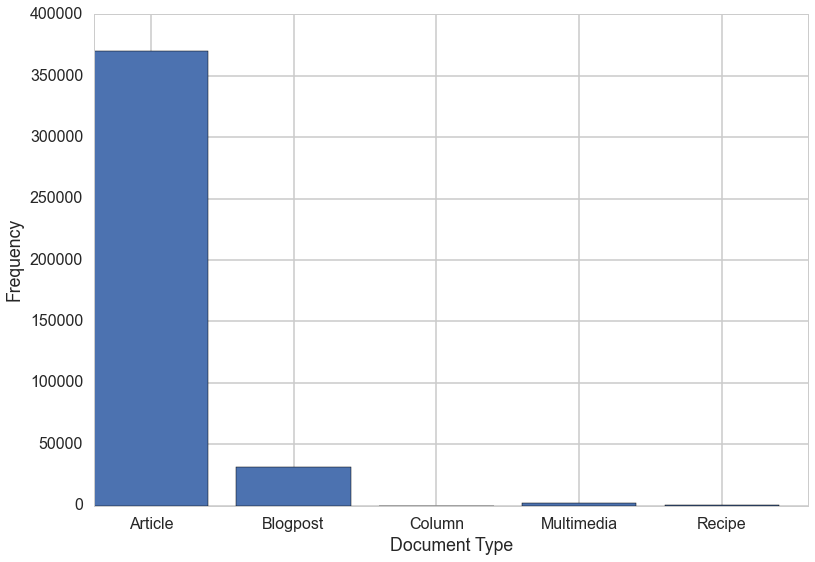

In [46]:
plt.bar(np.arange(1,6), type_counts)
plt.xticks(np.arange(1,6)+0.4,('Article', 'Blogpost', 'Column', 'Multimedia', 'Recipe'))
plt.xlabel('Document Type')
plt.ylabel('Frequency')
plt.show()

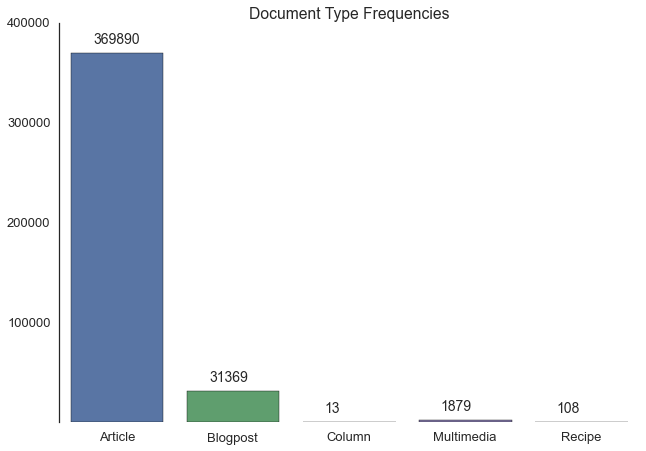

In [107]:
sns.set(style="white", context="talk")
ax = sns.barplot(x=('Article', 'Blogpost', 'Column', 'Multimedia', 'Recipe'), y=type_counts)
ax.set(title="Document Type Frequencies",ylim=(0,400000),yticks=[100000,200000,300000,400000])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+10000, '%d'%height, fontsize=14)
#ax.text(-0.2,380000, "369,890", fontsize=14)
#ax.text(0.82,40000, "31,369", fontsize=14)
sns.despine(bottom=True)

In [26]:
df.groupby('date').count()

,abstract,doctype,headline,id,news_desk,paragraph,section,subsection,text,type
date,,,,,,,,,,
1966-01-01,3,3,3,3,0,2,0,0,3,3
1966-01-02,25,28,28,28,0,21,0,0,28,28
1966-01-03,9,9,9,9,0,9,0,0,9,9
1966-01-04,8,11,11,11,0,8,0,0,11,11
1966-01-05,15,18,18,18,0,15,0,0,18,18
1966-01-06,7,11,11,11,0,7,0,0,11,11
1966-01-07,9,11,11,11,0,9,0,0,11,11
1966-01-08,10,13,13,13,0,11,0,0,13,13
1966-01-09,28,32,32,32,0,26,0,0,32,32


In [28]:
print 18051./365.

49.4547945205


In [ ]:
plt.hist()